# Lab1 Titanic passangers' data analysis
---

By doing this lab you should get acquinted with API of basic machine learning python libraries such as:

* scikit-learn
* numpy
* pandas
* matplotlib

This task will give ?? points

## TASK:

[Kaggle](https://www.kaggle.com/) is a data analysis competition platform. Even if you don't interested in that kind of competitions (but there is assumption that you should be interested), there are a lot of examples of rather good data analysis, called [kernels](https://www.kaggle.com/kernels) in kaggle terminology, that you can consult during this course.

1. You should register on [Kaggle](https://www.kaggle.com/) to be able to download datasets.
2. Download dataset `train.csv` from [Titanic: Machine Learning from Disaster](http://www.kaggle.com/c/titanic-gettingStarted/data). You will find dataset description there as well.
3. Every research or analysis are meaningless without right questions, hypothesises? To warm up you need to find meaningfull answers for the next questions:
    - How many passengers was travelling by first class?
    - What is the most popular female name on board?
    - How does ticket cost varie?
    - What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?
    - Are there any dependencies between class and ticket number?
    - What part of passengers was able to survive?
    - Are there any correlation between the number of brothers/sisters and the number of parents/kids ?
   
4. Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules? 
5. Check the following assumptions:
    - Females survived more frequently than mens
    - Passangers with more expensive tickets survived with higher probability
    
## Report

All reports should be delivered in the format of IPython (Jupyter) Notebooks (`.ipynb` files). 



## TOOLS AND LINKS

  * [Collection of interesting notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

###  Python libraries

  * [NumPy](http://www.numpy.org/)
    - [graph library Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [how to work with datasets using pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — matlab graph utility emulation in python
    - [example gallery](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)





In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)

In [49]:
r = pd.DataFrame.from_csv('train.csv')
r

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# How many passengers was travelling by first class?

In [41]:
passclass = r.groupby('Pclass')
len(passclass.get_group(1))

216

# What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?

Titles

In [40]:
print( set([x.split(',')[1].split('.')[0][1:] for x in r['Name']]))

{'Mrs', 'Dr', 'Ms', 'Miss', 'Mr', 'Mlle', 'Col', 'Sir', 'Major', 'Jonkheer', 'Capt', 'the Countess', 'Rev', 'Don', 'Mme', 'Master', 'Lady'}


Which class

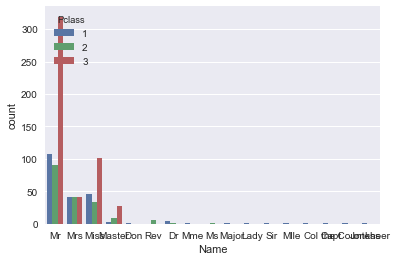

In [48]:
fields = ['Pclass', 'Name']
p = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
p['Name'] = [x.split(',')[1].split('.')[0][1:] for x in p['Name']]
sns.countplot(x="Name", hue="Pclass", data=p)
#p = pd.DataFrame.from_cs

# What is the most popular female name on board?

C:\Users\mariy\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


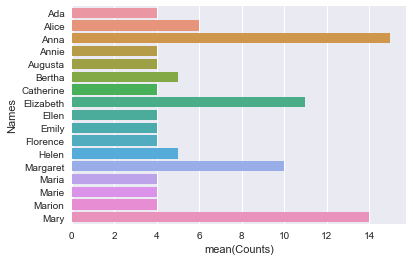

In [91]:
fields = ['Name', 'Sex']
z = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
sex = z.groupby('Sex')
females = sex.get_group("female")
def popname(x):
    y = x.split('(')
    if len(y) > 1: 
        q = x.split('(')[1].split(' ')[0]
        if (')') in (q):
            return q[:len(q)-1]
        return q
    else: 
        return x.split('.')[1].split(' ')[1]
females.Name = [popname(i) for i in females.Name]
names, counts = np.unique(females.Name, return_counts = True)
indexes = [x for x in range(len(counts)) if counts[x] > 3]
indexes
z2 = pd.DataFrame({})
z2['Names'] = np.array(names)[indexes]
z2['Counts'] = np.array(counts)[indexes]
sns.barplot(x="Counts", y="Names", data=z2)

# How does ticket cost varie?

In [96]:
print("max_cost = ", np.max(r.Fare))
print("min_cost = ", np.min(r.Fare))
print("mean_cost = ", np.mean(r.Fare))
print("standard_deviation = ", np.std(r.Fare))

max_cost =  512.3292
min_cost =  0.0
mean_cost =  32.2042079685746
standard_deviation =  49.66553444477411


# What part of passengers was able to survive?

In [102]:
survivors = r.groupby('Survived')
print("part of survived passengers = ", len(survivors.get_group(1))/len(r))

part of survived passengers =  0.3838383838383838


# Are there any dependencies between class and ticket number?

In [123]:
def ticket(x):
    y = x.split(' ')
    if len(y) > 1: 
        q = x.split(' ')[1]
        try:
            return int(q[0])
        except:
            return -1
    else: 
        try:
            return int(x[0])
        except:
            return -1
ticket_number = [ticket(x) for x in r["Ticket"]]
z3 = pd.DataFrame({})
z3['Pclass'] = r.Pclass
z3['Ticket'] = ticket_number
index = [x for x in range(len(z3)) if int(z3['Pclass'].iloc[x]) == int(z3['Ticket'].iloc[x])]
print("Possibility of matching of class number and first digit in Ticket number is", len(index)/len(z3))

Possibility of matching of class number and first digit in Ticket number is 0.7250280583613917


# Are there any correlation between the number of brothers/sisters and the number of parents/kids?

In [134]:
fields = ['SibSp', 'Parch']
z4 = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
ind1 = [x for x in range(len(z4)) if (int(z4['SibSp'].iloc[x]) > 1) and (int(z4['Parch'].iloc[x]) > 0)]
ind2 = [x for x in range(len(z4)) if int(z4['SibSp'].iloc[x]) > 1]
print("Possibility of any parches exists aboard if there are more than 1 siblings is",len(ind1)/len(ind2))

Possibility of any parches exists aboard if there are more than 1 siblings is 0.7567567567567568


In [135]:
ind3 = [x for x in range(len(z4)) if (int(z4['SibSp'].iloc[x]) == 0) and (int(z4['Parch'].iloc[x]) == 0)]
ind4 = [x for x in range(len(z4)) if int(z4['SibSp'].iloc[x]) == 0]
print("Possibility of any parches doesn't exist aboard if there are no siblings is",len(ind3)/len(ind4))

Possibility of any parches doesn't exist aboard if there are no siblings is 0.8832236842105263


# Check the following assumptions: Females survived more frequently than mens

In [140]:
fields = ['Survived', 'Sex']
z5 = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
ind5 = [x for x in range(len(z5)) if (z5['Sex'].iloc[x] == "female") and (int(z5['Survived'].iloc[x]) == 1)]
ind_fem = [x for x in range(len(z5)) if (z5['Sex'].iloc[x] == "female")]
ind6 = [x for x in range(len(z5)) if (z5['Sex'].iloc[x] == "male") and (int(z5['Survived'].iloc[x]) == 1)]
ind_male = [x for x in range(len(z5)) if (z5['Sex'].iloc[x] == "male")]
print("Survived females part of all females is", len(ind5)/len(ind_fem))
print("Survived males part of all males is", len(ind6)/len(ind_male))
print("Survived females part of all passeggers is", len(ind5)/len(z5))
print("Survived males part of all passeggers is", len(ind6)/len(z5))

Survived females part of all females is 0.7420382165605095
Survived males part of all males is 0.18890814558058924
Survived females part of all passeggers is 0.2615039281705948
Survived males part of all passeggers is 0.122334455667789


# Passangers with more expensive tickets survived with higher probability

In [152]:
fields = ['Pclass', 'Survived']
z6 = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
print(z6.groupby(['Pclass'])['Survived'].value_counts(normalize=True))

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64


## Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules? 

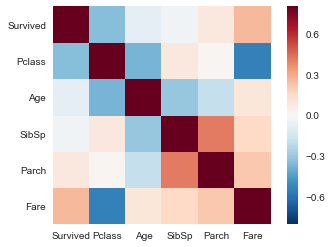

In [154]:
sns.heatmap(r.corr(), vmax=.8, square = True)

In [171]:
fields = ['Pclass', 'Age', 'Survived']
z7 = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
#ind_0_15 = [x.Pclass for x in (z7) if int(x.Age) >= 0 and int(x.Age) < 15]
#len(ind_0_15)/len([x for x in (z7) if int(x.Survived) == 1])
#ind_15_30 = [x.Pclass for x in range(len(z7)) if int(z7.Pclass[x]) >= 15 and int(z7.Pclass[x]) < 30]
#ind_30_50 = [x.Pclass for x in range(len(z7)) if int(z7.Pclass[x]) >= 30 and int(z7.Pclass[x]) < 50]
#ind_50_100 = [x.Pclass for x in range(len(z7)) if int(z7.Pclass[x]) >= 50 and int(z7.Pclass[x]) < 100]
#[print(x[2]) for x in z7.iteritems()]
age_group = z7.groupby({'Age': [1.0, 15.0, 30.0]})


,Survived,Pclass,Age
